# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox

## Reddit Networks
Using the [Movie Dynamics Networks dataset](https://www.kaggle.com/datasets/michaelfire/movie-dynamics-over-15000-movie-social-networks) select the subreddit of your favorite  movie show. Using the data of the selected movie,
answer the following questions:

**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

In [ ]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt

# Mount Google Drive (if not done already)
from google.colab import drive
drive.mount('/content/drive')

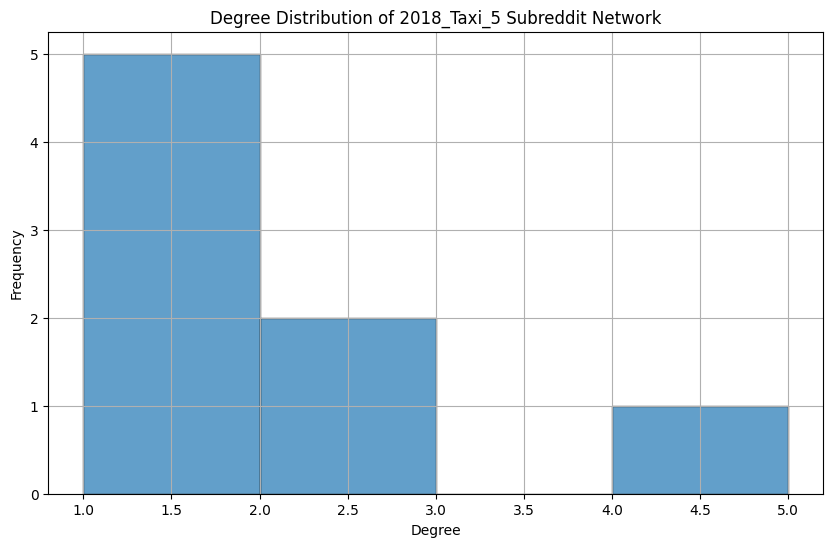

In [19]:
# Set the path to the directory containing the movie JSON files
directory_path = '/content/drive/MyDrive/PhD/BGU/BigData/HW4/moviedynamics'

# Choose your favorite movie (substitute with the actual movie name)
movie_name = '2018_Taxi_5'  # Change this to your favorite movie's name (without .json)
movie_path = os.path.join(directory_path, f'{movie_name}.json')

# Load the movie data (subreddit network)
with open(movie_path, 'r') as file:
    movie_data = json.load(file)

# Create a NetworkX graph from the movie data
G = nx.Graph()

# Assuming the JSON contains 'nodes' and 'edges' keys (modify if the structure is different)
# Add nodes and edges to the graph
for node in movie_data['nodes']:
    G.add_node(node['id'], label=node['role'])

for edge in movie_data['links']:
    G.add_edge(edge['source'], edge['target'])

# Calculate degree distribution
degree_sequence = [G.degree(n) for n in G.nodes()]
degree_count = {degree: degree_sequence.count(degree) for degree in set(degree_sequence)}

# Visualize degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 1), edgecolor='black', alpha=0.7)
plt.title(f'Degree Distribution of {movie_name} Subreddit Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Task 2:** Create a subgraph of the top-12 movie characters according to a selected centrality algorithm. Draw the subgraph using circlular layout (15pt)

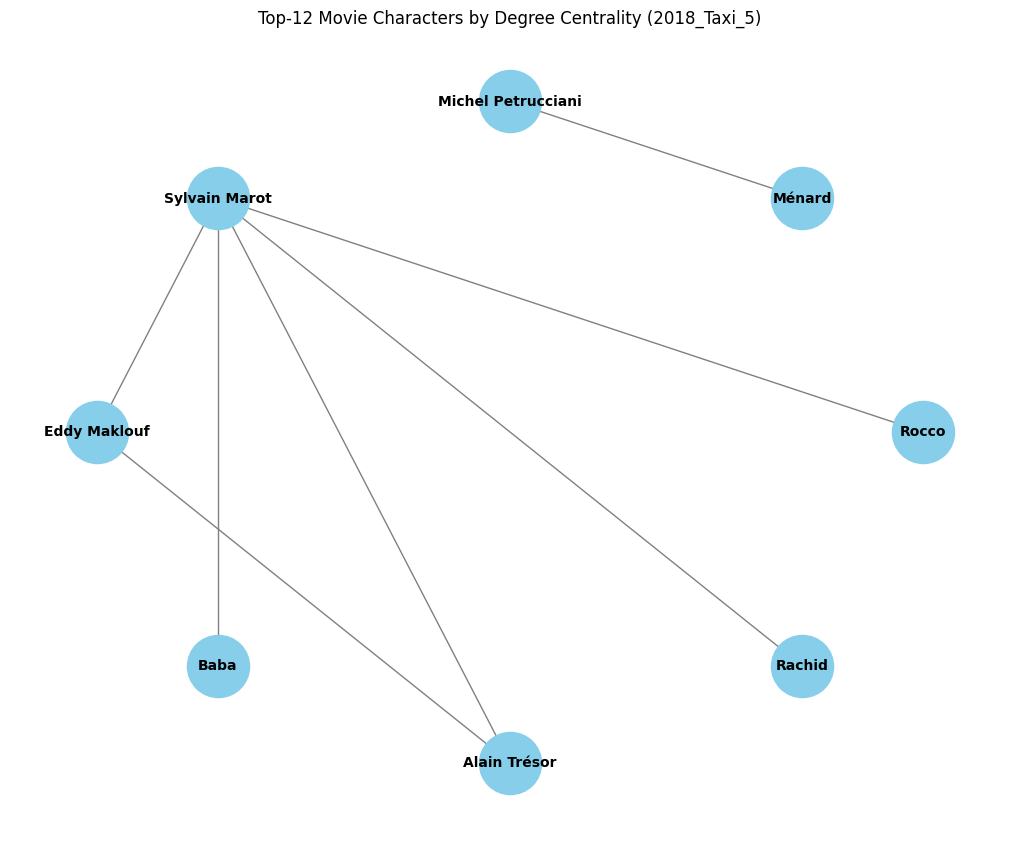

In [21]:
# Step 1: Calculate centrality using Degree Centrality (you can change this to other centrality metrics)
degree_centrality = nx.degree_centrality(G)

# Step 2: Select the top-12 characters with the highest centrality scores
top_12_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:12]

# Step 3: Create a subgraph of the top-12 nodes
top_12_subgraph = G.subgraph(top_12_nodes)

# Step 4: Visualize the subgraph using a circular layout
plt.figure(figsize=(10, 8))
nx.draw_circular(top_12_subgraph, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title(f"Top-12 Movie Characters by Degree Centrality ({movie_name})")
plt.show()


**Task 3:** Calculate the PageRank, triangles, and average shortest path of each vertex in the graph (15pt)

PageRank: {'Rocco': 0.06959933202334465, 'Ménard': 0.125, 'Michel Petrucciani': 0.125, 'Sylvain Marot': 0.2991167153445486, 'Eddy Maklouf': 0.12104264429270872, 'Baba': 0.06959933202334465, 'Alain Trésor': 0.12104264429270872, 'Rachid': 0.06959933202334465}
Triangles: {'Rocco': 0, 'Ménard': 0, 'Michel Petrucciani': 0, 'Sylvain Marot': 1, 'Eddy Maklouf': 1, 'Baba': 0, 'Alain Trésor': 1, 'Rachid': 0}
Average Shortest Path: {'Rocco': 1.5, 'Sylvain Marot': 0.8333333333333334, 'Eddy Maklouf': 1.3333333333333333, 'Baba': 1.5, 'Alain Trésor': 1.3333333333333333, 'Rachid': 1.5, 'Michel Petrucciani': 0.5, 'Ménard': 0.5}


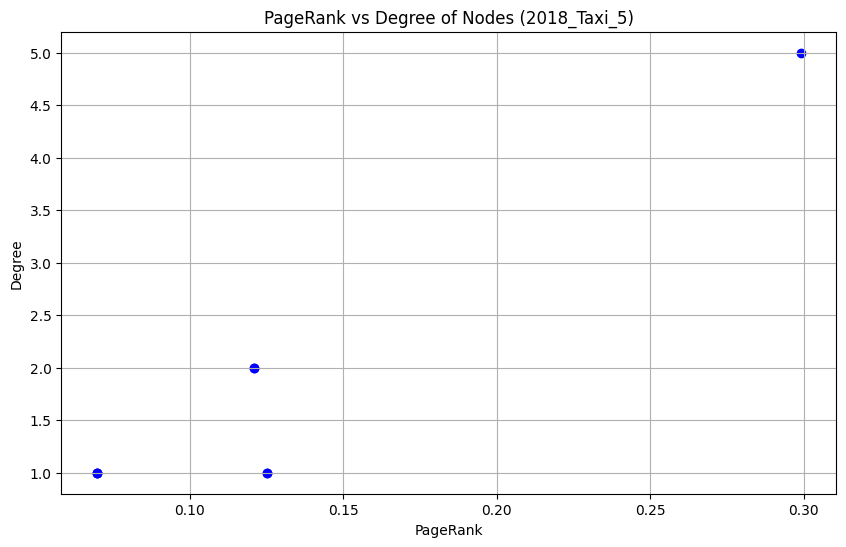

In [25]:
# Step 1: Calculate PageRank for each node
pagerank = nx.pagerank(G)

# Step 2: Calculate the number of triangles each node is part of
# Triangles count per node
triangles = nx.triangles(G)

# Step 3: Calculate the average shortest path length for each connected component
avg_shortest_path = {}
for component in nx.connected_components(G):
    subgraph = G.subgraph(component)  # Get the subgraph for each connected component
    # Compute the average shortest path length within this component
    for node in subgraph.nodes():
        # Calculate the shortest path lengths from the node to all other reachable nodes
        lengths = nx.single_source_shortest_path_length(subgraph, node)

        # Compute the average length of the paths (only considering reachable nodes)
        avg_shortest_path[node] = sum(lengths.values()) / len(lengths)

# Print the results for each node
print("PageRank:", pagerank)
print("Triangles:", triangles)
print("Average Shortest Path:", avg_shortest_path)

# Optional: Visualize the results
# For example, visualize the degree of each node versus its PageRank
plt.figure(figsize=(10, 6))
plt.scatter(list(pagerank.values()), list(dict(G.degree()).values()), color='blue')
plt.title(f"PageRank vs Degree of Nodes ({movie_name})")
plt.xlabel("PageRank")
plt.ylabel("Degree")
plt.grid(True)
plt.show()


**Task 4:** Use Cytoscape and Gephi to visualize the network, where each vertex size is correlates to its degree (15pt)

**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of verticies and edges in the subgraph (5pt)

**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges (Tip: use SGraph or use Vaex and generate a subgraph and use igraph)

**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

### Additional Questions for Practice

**Task 1:** Visualize the distribution of the network's strongly and weakly connected components.

**Task 2:** Using Cytoscape, visualize the network's maximal strongly connected component (or part of it)

**Task 3:** Draw a subgraph of all the vertices that have at least one reciprocal link, i.e., all the vertices where there is at least one vertex _u_ so that both links (u,v) and (v,u) exists

**Task 4:** Split the network into communities, and find the second most central vertex in each community
    

**Task 5:** Find the top-10 most central players at [The Free Internet Chess Server](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz).
    Visualize part of the network.
    
**Note:** The network has 429,747,476 edges